In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
h_file = "Dallas_County_Hosptials4.csv"
c_file = "DallasCensusData.csv"

In [3]:
h_df = pd.read_csv(h_file)
c_df = pd.read_csv(c_file)


h_df.tail()

,Unnamed: 0,Hospital Name,Address,State,ZIP Code,County Name,Hospital Type,Emergency Services,Hospital overall rating
22,4641,CITY HOSPITAL AT WHITE ROCK,9440 POPPY DR,TX,75218,DALLAS,Acute Care Hospitals,True,2
23,4642,TEXAS GENERAL HOSPITAL,2709 HOSPITAL BLVD,TX,75051,DALLAS,Acute Care Hospitals,True,Not Available
24,4660,BAYLOR SCOTT AND WHITE HEART AND VASCULAR HOSP...,621 NORTH HALL STREET,TX,75226,DALLAS,Acute Care Hospitals,True,5
25,4698,CRESCENT MEDICAL CENTER LANCASTER,2600 WEST PLEASANT RUN ROAD,TX,75146,DALLAS,Acute Care Hospitals,True,Not Available
26,4755,TEXAS SCOTTISH RITE HOSPITAL FOR CHILDREN,2222 WELBORN STREET,TX,75219,DALLAS,Childrens,False,Not Available


In [4]:
zip_merge_df = pd.merge(c_df,h_df,left_on='Zipcode', right_on='ZIP Code', how='inner')
zip_merge_df.head()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Count,City,Unnamed: 0,Hospital Name,Address,State,ZIP Code,County Name,Hospital Type,Emergency Services,Hospital overall rating
0,75001,13214.0,32.2,57633.0,43919.0,1722.0,13.031633,433.0,Addison,4567,METHODIST HOSPITAL FOR SURGERY,17101 DALLAS PARKWAY,TX,75001,DALLAS,Acute Care Hospitals,True,5
1,75006,47590.0,34.8,56985.0,27010.0,6927.0,14.555579,1996.0,Carrollton,4205,FIRST TEXAS HOSPITAL CARROLLTON LLC,1401 E TRINITY MILLS ROAD,TX,75006,DALLAS,Acute Care Hospitals,True,Not Available
2,75039,12197.0,32.2,73503.0,65135.0,819.0,6.714766,264.0,Irving,4089,MEDICAL CITY LAS COLINAS,6800 N MACARTHUR BLVD,TX,75039,DALLAS,Acute Care Hospitals,True,3
3,75051,41345.0,29.4,40107.0,16077.0,9865.0,23.860201,2442.0,Grand Prairie,4642,TEXAS GENERAL HOSPITAL,2709 HOSPITAL BLVD,TX,75051,DALLAS,Acute Care Hospitals,True,Not Available
4,75061,53233.0,30.6,40084.0,17739.0,11404.0,21.422802,2247.0,Irving,3519,BAYLOR MEDICAL CENTER AT IRVING,1901 N MACARTHUR BLVD,TX,75061,DALLAS,Acute Care Hospitals,True,4


In [5]:
results = [] 

for x in zip_merge_df["Household Income"]:
        if x <= 24950:
            results.append("Very Low")
        elif x >= 24951 and x <= 41550:
            results.append("Low")
        else:
            results.append("Moderate")
            
zip_merge_df["Income Bracket"] = results

zip_merge_df["Income Bracket"].unique()

array(['Moderate', 'Low', 'Very Low'], dtype=object)

<BarContainer object of 3 artists>

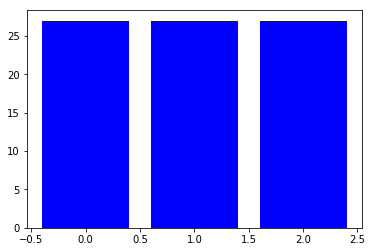

In [6]:
x_axis = np.arange(len(zip_merge_df["Income Bracket"].unique()))
plt.bar(x_axis, len(zip_merge_df["Hospital Name"]), color="b", align="center")

([<matplotlib.axis.XTick at 0x2bb7ac2f208>,
 <a list of 3 Text xticklabel objects>)

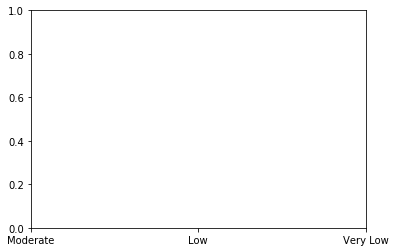

In [7]:
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, zip_merge_df["Income Bracket"].unique())